# Name Popularity Algorithim

* **Semester:** Fall 2020
* **Author:** Ted Woodsides `<ktw51962@uga.edu>`

## Introduction

In this section I will describe the problem I will be solving with my algorithim.

Researching the popularity of baby names has always been something that has captivated Americans. This research can be used as entertainment, but some people, specifically expecting parents, want to know if certain names are becoming too popular to give their child. The parents do not want to give their child a name that other people in his or her classes have. This research requires parents to look over many data sets depeneding on how many years back they want to look at, as well as searching in each data set for each name they are considering. This can be a long and tedious process. 

In my project, I will use a dataset of Social Security Names from 1880-2018 to create an algorithim that allows parents, or curious people, to enter in a range of years, a list of names, and a gender. This will output a graph that shows the percentage of babies with those names over the specified range. 

The follwing image below shows an example of the desired output:
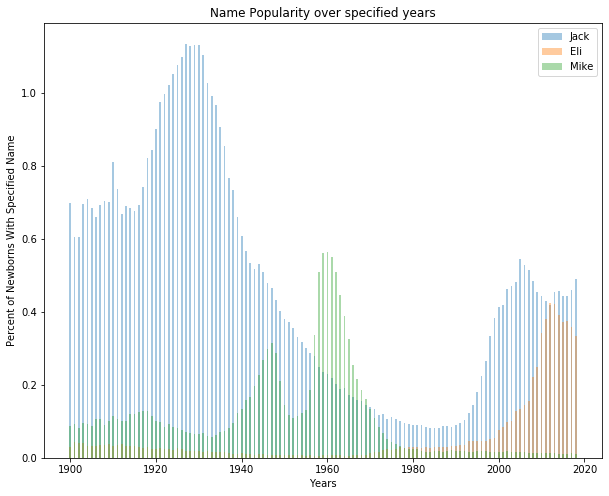

# Algorithim

In this section I will describe my algorithim in detail.

1. I began by importing 3 modules, pandas, numpy, and matplotlib.pyplot. The following is descriptions of these 3 modules:
>1. Pandas is a fast, powerful, and easy to use open source data analysis and manipulation tool.
>2. Numpy is a module used to perform a number of mathematical operations on multi-dimensional arrays and matricies
>3. matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

I will use pandas functions to read in the data, create dataframe, and manipulate dataframes. Numpy is used to arrange the x axis lables, and matplotlib.pyplot is used for plotting functions.


2. The next step is to create a function that reads in the social security names data for a specified amount of years and combines them into a single dataframe. It then uses this dataframe to calculate the total number of males and females born each specified year. It is worth noting that the data is in a zip file with the format yob("year").txt with columns for name, gender, and the count of that name. The following are the steps for the function:
  >1. create empty dataframe
  >2. create a range for the user specified years (be careful with python rangers)
  >3. create for loop that does the following:
  >>1. grab the the files from the the zip drive that correspond to the user specified years
  >>2. for each of these files create column names for names, gender, and count
  >>3. Make the first column of the data frame the year
  >>4. Add this data frame to the empty dataframe
  >>5. Create a seperate dataframe for each gender and group them by year
  >>6. Take the sum of the count column for each of the grouped dataframes, this is the total count of male and females born each year
  >4. Finally, return a dictionary for the dataframe with all the data, the female count, and the male count.

3. The next step is to create the plot function. This will need to take in multiple names, a gender, and specified ranges to create the desired output. The following are the steps for the function:
  >1. first a variable needs to be created that calls all the data with the specified years from the previous function. This can be done because a dictionary was made.
  >2. use conditional execution to grab the female count or the male count depending on user specified gender. This again will use dictionary properties
  >3. subset the dataframe from part 1 into the user specified sex
  >4. this dataframe then needs to be subsetted to only have the names that the user specified
  >5. merge the data set from 4 with the counts from part 2 based on year
  >6. create a way to calculate the percentage of babies with the name by dividing the number of babies with a specific name in a year divided by the number of babies born in that year. This should be a column in the merged dataframe
  >7. index this dataframe by year and select just the names and percentages as this is what is needed to plot
  >8. set figure size for plotting and arrange the years to create x labels
  >9. Create a for loop that does the following for each user inputted name :
  >>1. takes the dataframe from part G and grabs the percentages over the specified years
  >>2. plots these percentages as a bar plot
  >>3. add legend, title, x-axis label, and y-axis label
 
  
  



  

## Implementation

In this section, I will implement my alogrithim by importing the modules and running the two functions.

### Importing the Modules


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Function 1: read_ssn

In [3]:
def read_ssn(begin_year,end_year):
    """ Returns count of male and females born in range of years.
    
    This function will return the count of male and females
    born in a range of years. The data will come from a zip
    file of social security names, gender, and count of that name
    for each year from 1880-2018. 
    
    Args:
    begin_year -- first year that will return count
    end_year -- last year that will return count
    
    Raises:
    ValueError if
    - begin year is greater than 2017 or less than 1880
    - end year is greater than 2018 or less than 1881
    - end year is less than begin year
    - end year is equal to begin year
    
    
    Returns:
    count of male and female born for every year in the range
    of the begin year and end year
    """
    all_years = pd.DataFrame()
    year = list(range(begin_year, end_year+1))
    if (begin_year > 2017 or begin_year < 1880):
        raise ValueError('Improper year entry - begin_year must be less than 2017 and greater than 1880')
    elif (end_year > 2018 or end_year < 1881):
        raise ValueError('Improper year entry - end_year must be less than 2018 and greater than 1881')
    elif (end_year < begin_year):
        raise ValueError('Improper year entry - end_year cannot be less than begin_year')
    elif (end_year == begin_year):
        raise ValueError('Improper year entry - end_year cannot equal begin_year')
    else:
        for y in year:
            file = ("yob"+str(y)+".txt")
            df = pd.read_csv(file, names=["names","gender","count"])
            df.insert(0, "year", y)
            all_years = pd.concat([all_years, df], axis = 0)
            male = all_years[all_years.gender == "M"]
            female = all_years[all_years.gender == "F"]
            female_grouped = female.groupby('year')
            male_grouped = male.groupby('year')
            female_count = female_grouped['count'].sum()
            male_count = male_grouped['count'].sum()
        return{'all_years': all_years,'female_count': female_count,'male_count': male_count}

### Main Function: plot_names

In [4]:
def plot_names(*args, sex, begin_year = 1880, end_year = 2018):
    """Returns plot of popularity of names over specified years.
    
    This function will take in specified names, a certain gender of those names
    and specified years and will return a plot of the perctenage of newborns
    who recieved that name for each year. The data for this comes from the
    social security names dataset. 
    
    Args:
    *args : specified names seperated by commas
    sex : the gender of the names
    begin_year : first year to plot count - defaults to 1880
    end_year : last year to plot count - defaults to 2018
    
    Raises:
    ValueError if gender entry is not "m","M","f", or "F"
    
    Returns:
    plot of the perctange of kids born with each name
    for each specified year
    """
    names = read_ssn(begin_year,end_year)['all_years']
    if sex.lower() == 'm':
        names_total = read_ssn(begin_year, end_year)['male_count']
    elif sex.lower() == 'f':
        names_total = read_ssn(begin_year, end_year)['female_count']
    else:
        raise ValueError('invalid gender entry, must enter M,m,F,f ')
    names = names[names.gender == sex]
    names_input = names[names['names'].isin(args)]
    names_plot = pd.merge(names_input, names_total, on = 'year', how='inner')
    #calc percentage
    names_plot['percentage'] = (names_plot['count_x'] / names_plot['count_y'])*100
    years = list(range(begin_year,end_year+1))
    names_plot = names_plot.set_index('year')
    names_plot = names_plot[['names','percentage']]
    #set axis, ignore warning
    fig, ax = plt.subplots(figsize = (10,8))
    xpos = np.arange(len(years))
    for arg in args:
        #have to use ax functions insted of plt
        temp = names_plot[names_plot['names'] == arg]['percentage']
        ax.bar(x = years,height = temp, width = .4, label = arg,alpha=.4)
        ax.legend()
        ax.set_title('Name Popularity Over Specified Years')
        ax.set_xlabel('Years')
        ax.set_ylabel('Percent of Newborns With Specified Name')  

### Module Usage

In this section I will outline how I incorporated topics from each module into my project.

Module 1 : Multiple variables were created throughout the project

Module 2 : if/elif used depending on user specified gender

Module 3 : functions were defined, for loops were used in both functions, file input used

Module 4 : lists used to store specified years and govern for loop

Module 5 : dictionaries were used to select output from functions

' Plots the popularity of the given male names over specified years.\n\nThis testcase shows an example of how the algorithim works for five\ndifferent male names over specified years. The algorithim performs \nhow it was supposed to in this testcase plotting each of the 5 names\nand their popularity from 1980-2018.\n'

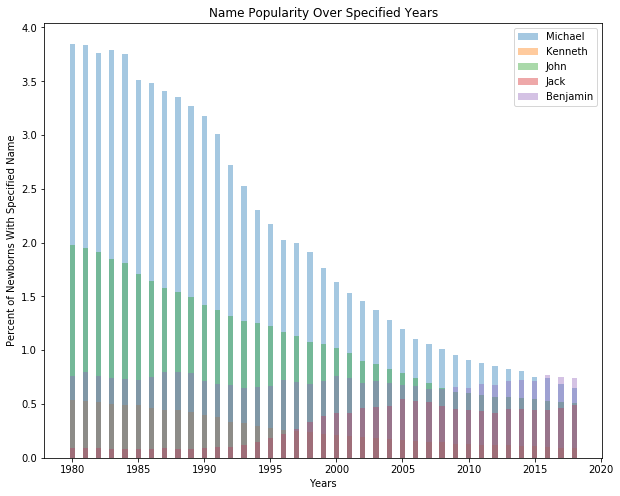

In [5]:
plot_names("Michael","Kenneth","John","Jack","Benjamin",sex="M",begin_year=1980,end_year=2018)
""" Plots the popularity of the given male names over specified years.

This testcase shows an example of how the algorithim works for five
different male names over specified years. The algorithim performs 
how it was supposed to in this testcase plotting each of the 5 names
and their popularity from 1980-2018.
"""

In [6]:
plot_names("Michael","Kenneth","John","Jack","Benjamin",sex="M",begin_year=2018,end_year=1980)
"""This test case shows an example of an error occuring.

In this test case the begin_year is greater than the end_year.
This is an invalid input because begin_year must be less than
end_year for the function to properly work. Thus, a ValueError
with the descirption is raised.
"""

ValueError: Improper year entry - begin_year must be less than 2017 and greater than 1880

' Plots the popularity of the given female names over specified years.\n\nThis testcase shows an example of how the algorithim works for five\ndifferent male names over specified years. The algorithim performs \nhow it was supposed to in this testcase plotting each of the 5 names\nand their popularity from 1980-2018.\n'

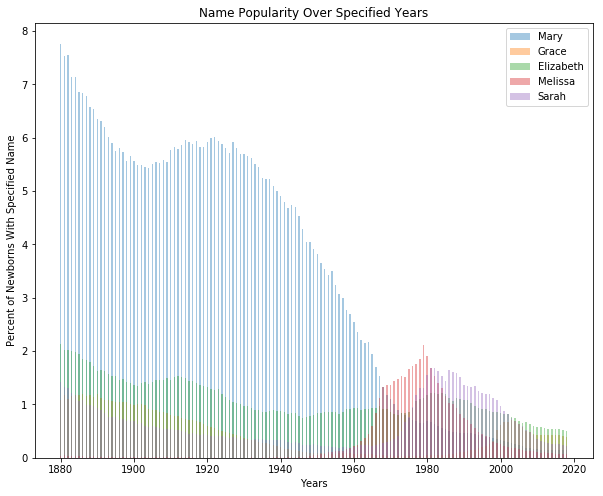

In [11]:
plot_names("Mary","Grace","Elizabeth","Melissa","Sarah",sex = "F",begin_year=1880,end_year=2018)
""" Plots the popularity of the given female names over specified years.

This testcase shows an example of how the algorithim works for five
different female names over specified years. The algorithim performs 
how it was supposed to in this testcase plotting each of the 5 names
and their popularity from 1880-2018.
"""

' Plots the popularity of the given male names over specified years.\n\nThis testcase shows an example of how the algorithim works for five\ndifferent male names over specified years. The algorithim performs \nhow it was supposed to in this testcase plotting each of the 5 names\nand their popularity from 1950-1980.\n'

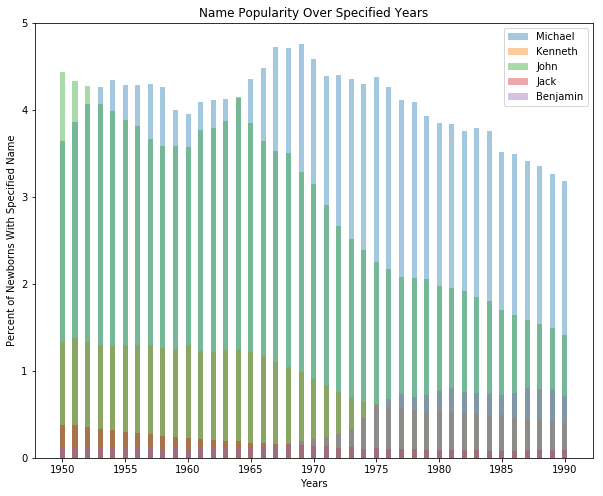

In [23]:
plot_names("Michael","Kenneth","John","Jack","Benjamin",sex="M",begin_year=1950,end_year=1990)
""" Plots the popularity of the given male names over specified years.

This testcase shows an example of how the algorithim works for five
different male names over specified years. The algorithim performs 
how it was supposed to in this testcase plotting each of the 5 names
and their popularity from 1950-1980.
"""

In [27]:
plot_names("Mary","Grace","Elizabeth","Melissa","Sarah",sex = "p",begin_year=1945,end_year=2005)
"""This test case shows an example of an error occuring.

In this test case the gender entry is not one of the 4 possiblities
This is an invalid input because the function needs to know which gender
the names are so it can grab the proper totals. Thus, a ValueError is raised
which tells the user what they need to enter.
"""

ValueError: invalid gender entry, must enter M,m,F,f 

### Shortcomings of Algorithim

The algorithim works well for the most part, but has some issues in handling specific names. I have done some dive into the data and believe that if you use a name that was not given anytime in the specified range of dates then the following error will arise "ValueError: shape mismatch: objects cannot be broadcast to a single shape"